In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
boston['MEDV'] = boston_dataset.target
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [34]:
boston.shape

(506, 14)

In [35]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [36]:
boston.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


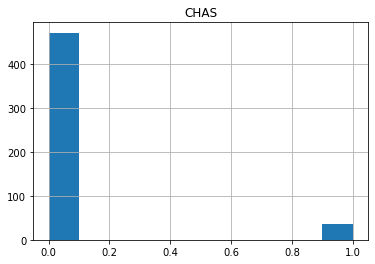

In [37]:
boston.hist(column = 'CHAS')
plt.show()

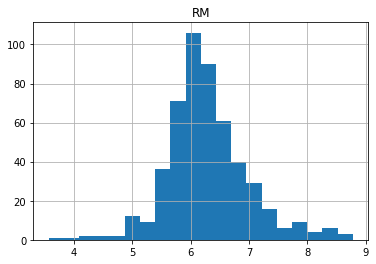

In [38]:
boston.hist(column = 'RM', bins = 20)
plt.show()

To understand the relationship among features (columns), a correlation matrix is very useful in the exploratory data 
analysis.Correlation measures linear relationships between variables.

It is symmetric where each element is a correlation coefficient ranging from -1 and 1. A value near 1 indicates
a strong positive correlation between variables

In [40]:
corr_matrix = boston.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


The last row or column is used to identify features that are most correlated

LSTAT (percentage of lower status of the population) is most negatively correlated with the target (-0.74) which means that
as the percentage of lower status drops, the median house values increases;

while RM (the average number of rooms per dwelling) is most positively correlated with MEDV (0.70) which means that the 
house value increases as the number of rooms increases.

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

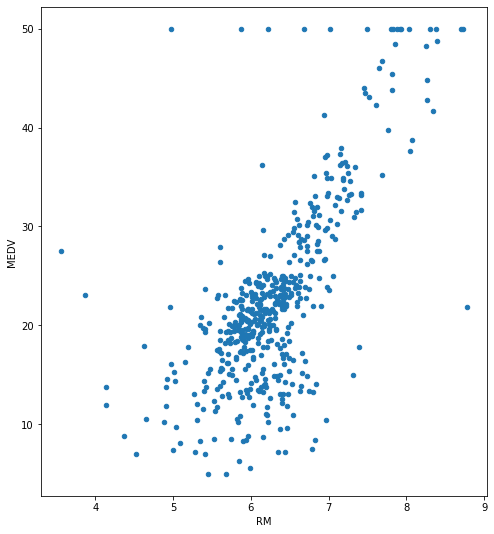

In [45]:
boston.plot(kind = 'scatter', x = 'RM', y = 'MEDV', figsize = (8,6))

The price increases as the value of RM increases linearly. 

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

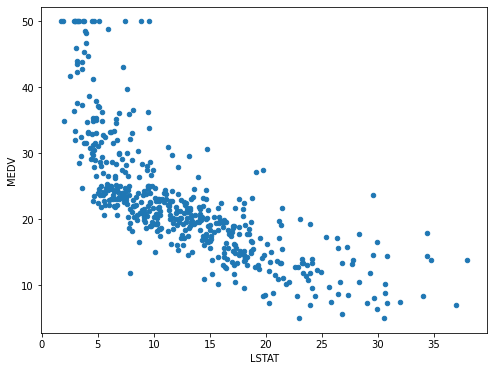

In [48]:
boston.plot(kind = 'scatter', x = 'LSTAT', y = 'MEDV', figsize = (8,6))

On the other hand prices tend to decrease with an increase in LSTAT; and the trend isn’t as linear.

Of the two features, RM appears a better choice for predicting MEDV. Thus we start with a univariate linear regression: 
    MEDV = b + m * RM.

In scikit-learn, models require a two-dimensional feature matrix (X, 2darray or a pandas DataFrame) and a one-dimensional
target array (Y).

Feature selection is used for several reasons, including simplification of models to make them easier to interpret, shorter training time, reducing overfitting,

In [50]:
X = boston[['RM']]
X.shape

(506, 1)

the double brackets around 'RM' in the code below, it is to ensure the result remains a DataFrame, a 2-dimensional data 
structure:

In [52]:
Y = boston['MEDV']
Y.shape

(506,)

In scikit-learn, every class of model is represented by a class in python. A class of model is not the same as an instance
of a model. Recall that instance is an individual object of a certain class. Thus, we first import the linear regression 
class, then instantiate the model, that is to create an instance of the class LinearRegression:


In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 1)
(152, 1)
(354,)
(152,)


We split the data into training and testing sets, To assess the performance of the model on newly unseen data. 
We train the model using a training set, and save the testing set for evaluation.

In [58]:
model.fit(X_train, Y_train)

-30.57

In short, fitting is equal to training. It fits the model to the training data and finds the coefficients specified in the linear regression model, i.e., intercept and slope. After it is trained, the model can be used to make predictions.

The fit() command triggers the computations and the results are stored in the model object.

Fitting is how well the machine learning model measures against the data upon which it was trained.

The linear regression model has been fitted, what it means is that both parameters, the intercept and the slope, have been learned.In Scikit-learn, by convention all model parameters have trailing underscores

In [61]:
model.intercept_.round(2)

-30.57

In [60]:
model.coef_.round(2)

array([8.46])

The two parameters represent the intercept and slope of the line fit to the data. Our fitted model is 
    MEDV = -30.57 + 8.46 * RM.
For one unit increase in RM, the median home price would go up by $8460.

Once the model is trained, supervised machine learning will evaluate test data based on previous predictions for the unseen data. We can make a prediction using the predict() method.

In [64]:
new_RM = np.array([6.5]).reshape(-1,1)
model.predict(new_RM)

#predicting one value 

array([24.42606323])

In [74]:
y_test_predicted = model.predict(X_test)
y_test_predicted.shape

#predicting the whole y_test 

(152,)

How good is our prediction?

We can examine model performance by visually comparing the fitted line and the true observations in the test set.


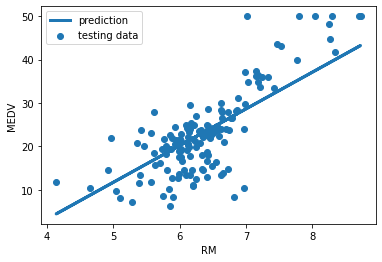

In [77]:
plt.scatter(X_test, Y_test, label = 'testing data')
plt.plot(X_test, y_test_predicted, label = 'prediction', linewidth = 3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc = 'upper left')
plt.show()

Some points sit on the line, but some are away from it. We can measure the distance between a point to the line along the vertical line, and this distance is referred to as residual or error. A residual is the difference between the observed value of the target and the predicted value. The closer the residual is to 0, the better job our model is doing.

We can calculate a residual and represent it in a scatter plot.

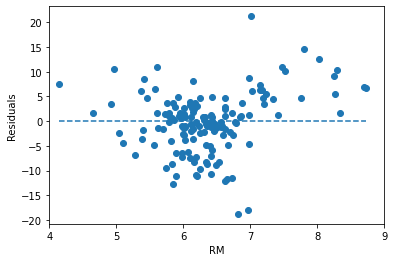

In [80]:
residuals = Y_test - y_test_predicted
plt.scatter(X_test, residuals)
plt.hlines(y = 0, xmin = X_test.min(), xmax = X_test.max(), linestyle = '--')
plt.xlim((4,9))
plt.xlabel('RM')
plt.ylabel('Residuals')
plt.show()

Residuals are scattered around the horizontal line, y = 0, with no particular pattern.

This seemingly random distribution is a sign that the model is working. Ideally the residuals should be symmetrically and randomly spaced around the horizontal axis; if the residual plot shows some pattern, linear or nonlinear, that’s an indication that our model has room for improvement.

Residual plots can reveal bias from the model and statistical measures indicate goodness-of-fit.



In [94]:
residuals.mean()

-0.23645087766388564

-0.24 is quite close to 0, but there’s a problem: residuals can be positive or negative so taking the average cancels them out. That’s not an accurate metric. 
Avg residuals is not a good idea to evaluate a model performance good because the positive residuals will cancel out negative residuals

To solve this, we take a square of each residual, then take the mean of squares. This is called mean squared error (MSE):

In [86]:
(residuals**2).mean()
#Another method
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_test_predicted)

36.517214730838624

In general, the smaller the MSE, the better, yet there is no absolute good or bad threshold. We can define it based on the dependent variable, i.e., MEDV in the test set. Y_test ranges from 6.3 to 50 with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad.

Another common metric to evaluate the model performance is called R-squared; one can calculate it via model.score():

It is the proportion of total variation explained by the model

In [89]:
model.score(X_test, Y_test)

0.6015774471545623

It is the proportion of total variation explained by the model. Here, around 60% of variability in the testing data is explained by our model.

The total variation is calculated as the sum of squares of the difference between the response and the mean of response, in the example of testing data:

In [91]:
((Y_test -Y_test.mean())**2).sum()

13931.482039473683

Whereas the variation that the model fails to capture is computed as the sum of squares of residuals:

In [95]:
(residuals**2).sum()

5550.6166390874705

In [97]:
#Multivariate Linear regression

X2 = boston[['RM', 'LSTAT']]
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.3, random_state  = 1)
model2 = LinearRegression()
model2.fit(X2_train, Y_train)

LinearRegression()

In [99]:
model2.intercept_

5.316818471096038

In [101]:
model2.coef_

array([ 4.12674118, -0.67762654])

In [105]:
y_test_predicted2 = model2.predict(X2_test)
y_test_predicted2.shape

(152,)

Which model is better? An easy metric for linear regression is the mean squared error (MSE) on the testing data. Better models have lower MSEs. Recall the MSE of the first model on testing data is

In [107]:
mean_squared_error(Y_test, y_test_predicted2)

28.934491341086545

The second model has a lower MSE, specifically a 21% reduction (36.52-28.93)/36.52 = 21%); thus it does a better job predicting the median home values than the univariate model.